# Polynomial Regression

In [1]:
library("IRdisplay")

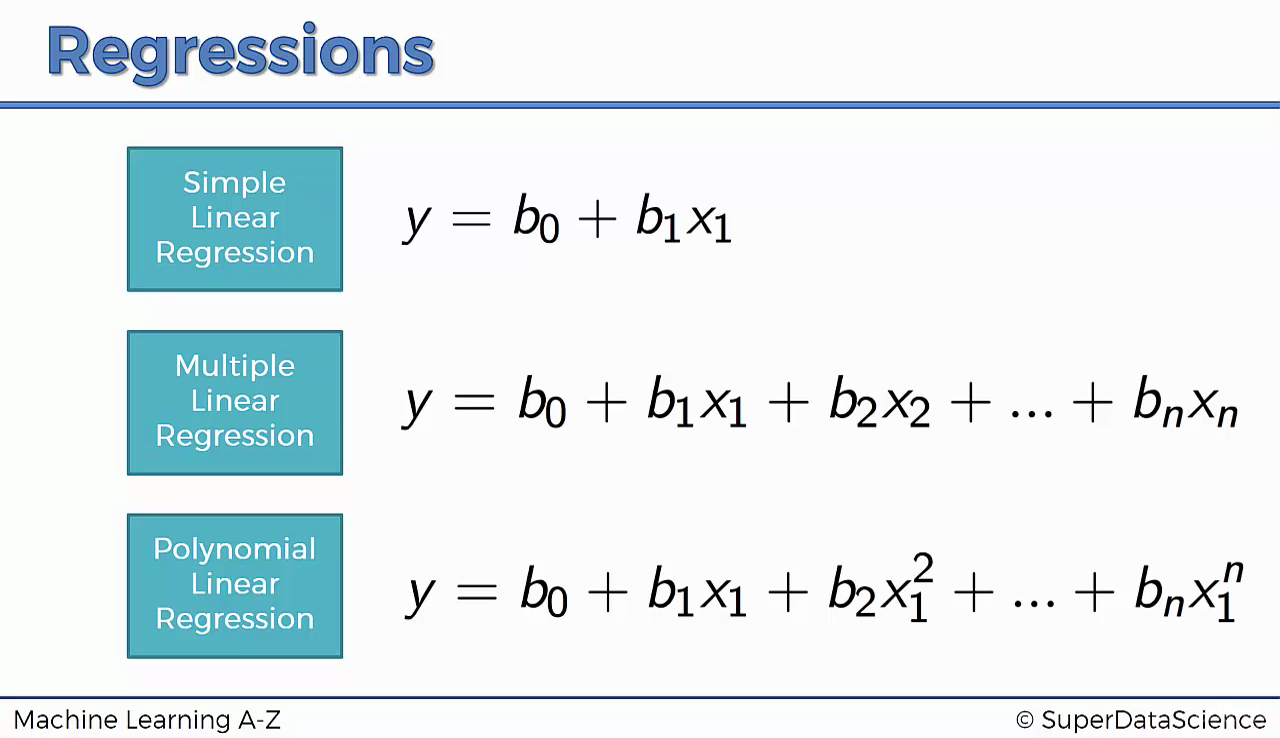

In [2]:
display_png(file="img/01.png")

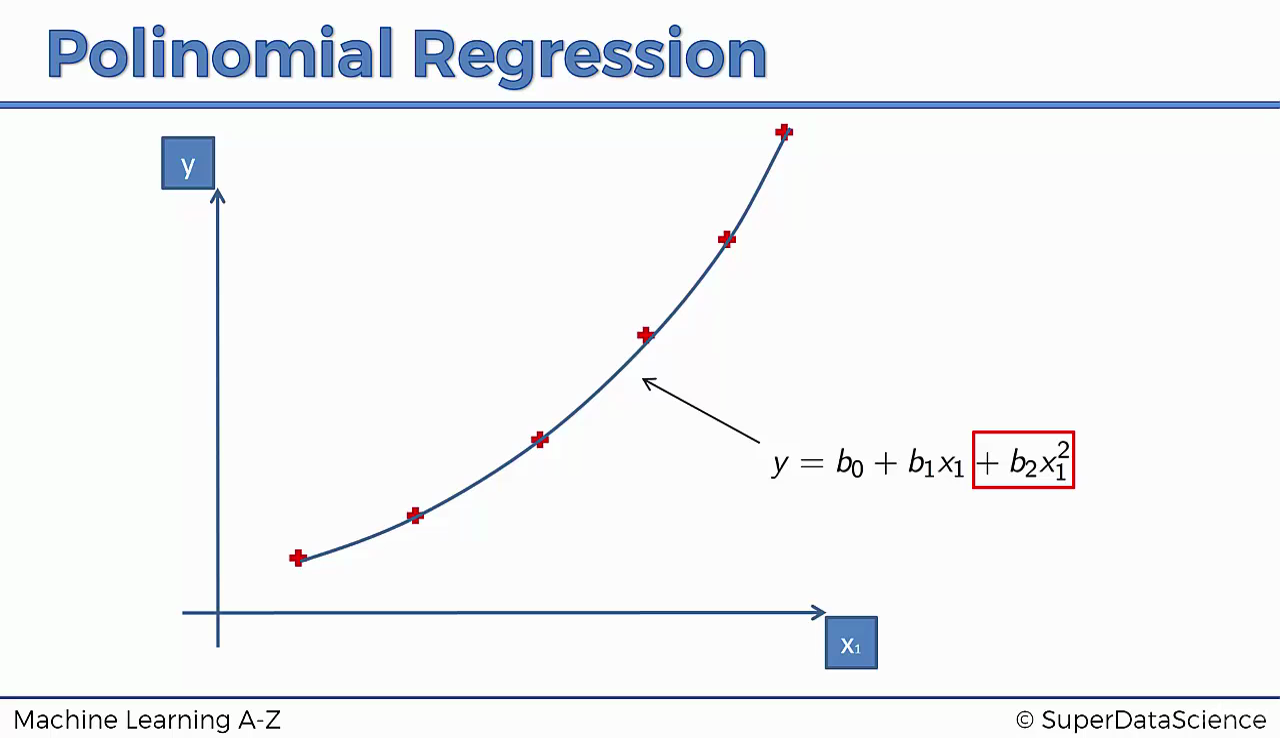

In [3]:
display_png(file="img/02.png")

### Data Preprocessing

In [59]:
# Importing the dataset
dataset = read.csv('Position_Salaries.csv')
dataset = dataset[2:3]

In [60]:
dataset

Level,Salary
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000
7,200000
8,300000
9,500000
10,1000000



* * *

**Problem Satement**: So we are human resource team working for a big company and we are about to hire a new employee in this company so this new entry seems to be great a good fit for the job and we are about to make an offer to this potential new employee and now it's time to negotiate negotiate on what is going to be the future salary of this new employees in the company.

And so at the beginning of the negotiation to simpler is telling that he's had twenty plus years of experience and eventually earned 160K. annual salary in its previous company so this employee is asking for at least more than a 160K.

However there is someone in the H. R. team that is kind of a control freak and always fantasized about being a detective so suddenly decides to call the previous employer to check that info you know the info about the previous a 160K annual salary of this future potential new employee but unfortunately all the info that this person manages to get are these info here that is the symbol table of salaries for ten different positions in the previous company.

So there's a term member of the team runs a simple analysis on excel or Google sheets and actually observed that there is a non linear relationship between these position of old and their associated salaries.

However this HR person could get another very relevant info this all the relevant info is that this new employee has been a region manager for two years now and usually it takes on average four years to jump from being a region manager to a partner.

So this simply was kind of half way between level 6 and level 7 and therefore we can say he was level **6.5**.

So now this HR guys getting all excited because he's selling to the team that he can build a blushing detector using regression models and predict if this new employees blushing about salary.

So at the beginning the team finds a little weird but it's kind of curious to see what's going to happen. And therefore here is the mission:

**This new employee is telling that his annual salary was a 160K. Let's predict if it's truth or bluff by building a blushing detector using polynomial regression.**

* * *


In [8]:
# install.packages('ggplot2')
# package to plot graph
library(ggplot2)

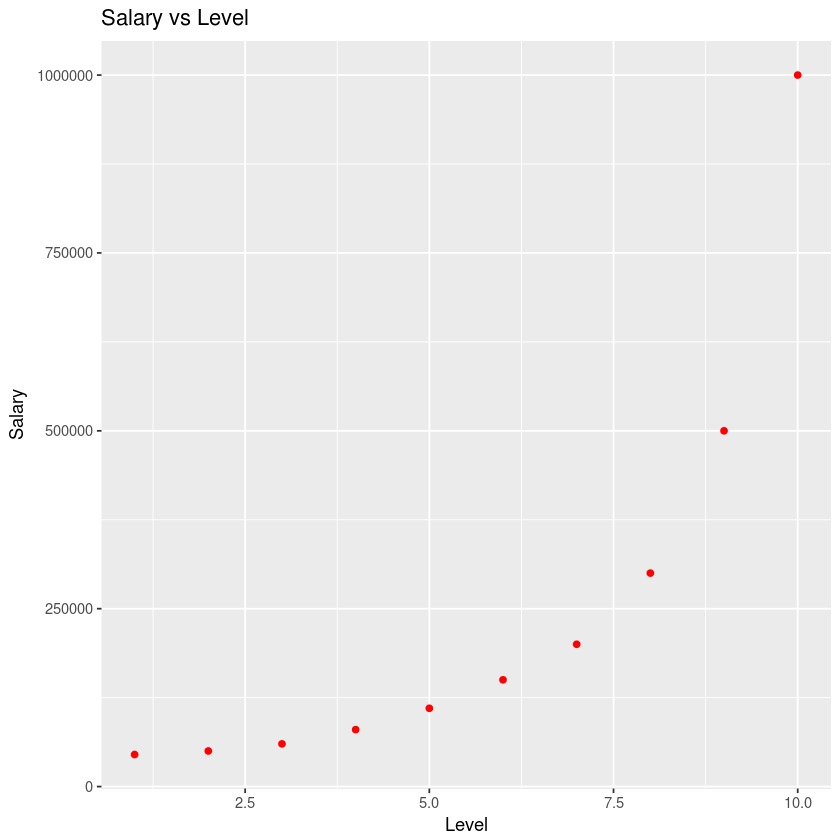

In [9]:
## geom for geometrical
ggplot() +
    geom_point(aes(x = dataset$Level, y = dataset$Salary),
               colour = 'red') +
    ggtitle('Salary vs Level') +
    xlab('Level') +
    ylab('Salary')

We can see the non-linear relationship between the Salary and Level

### Fitting Linear Regression to the dataset

In [19]:
lin_reg = lm(formula = Salary ~ ., data = dataset)

In [20]:
summary(lin_reg)


Call:
lm(formula = Salary ~ ., data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-170818 -129720  -40379   65856  386545 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -195333     124790  -1.565  0.15615   
Level          80879      20112   4.021  0.00383 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 182700 on 8 degrees of freedom
Multiple R-squared:  0.669,	Adjusted R-squared:  0.6277 
F-statistic: 16.17 on 1 and 8 DF,  p-value: 0.003833


### Fitting Linear Regression to the dataset

In [41]:
dataset$Level2 = dataset$Level ^ 2
dataset$Level3 = dataset$Level ^ 3
dataset$Level4 = dataset$Level ^ 4

In [42]:
dataset

Level,Salary,Level2,Level3,Level4
1,45000,1,1,1
2,50000,4,8,16
3,60000,9,27,81
4,80000,16,64,256
5,110000,25,125,625
6,150000,36,216,1296
7,200000,49,343,2401
8,300000,64,512,4096
9,500000,81,729,6561
10,1000000,100,1000,10000


In [43]:
poly_reg = lm(formula = Salary ~ ., data = dataset)

In [44]:
summary(poly_reg)


Call:
lm(formula = Salary ~ ., data = dataset)

Residuals:
     1      2      3      4      5      6      7      8      9     10 
 -8357  18240   1358 -14633 -11725   6725  15997  10006 -28695  11084 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  184166.7    67768.0   2.718  0.04189 * 
Level       -211002.3    76382.2  -2.762  0.03972 * 
Level2        94765.4    26454.2   3.582  0.01584 * 
Level3       -15463.3     3535.0  -4.374  0.00719 **
Level4          890.2      159.8   5.570  0.00257 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20510 on 5 degrees of freedom
Multiple R-squared:  0.9974,	Adjusted R-squared:  0.9953 
F-statistic: 478.1 on 4 and 5 DF,  p-value: 1.213e-06


### Visualising the Linear Regression results

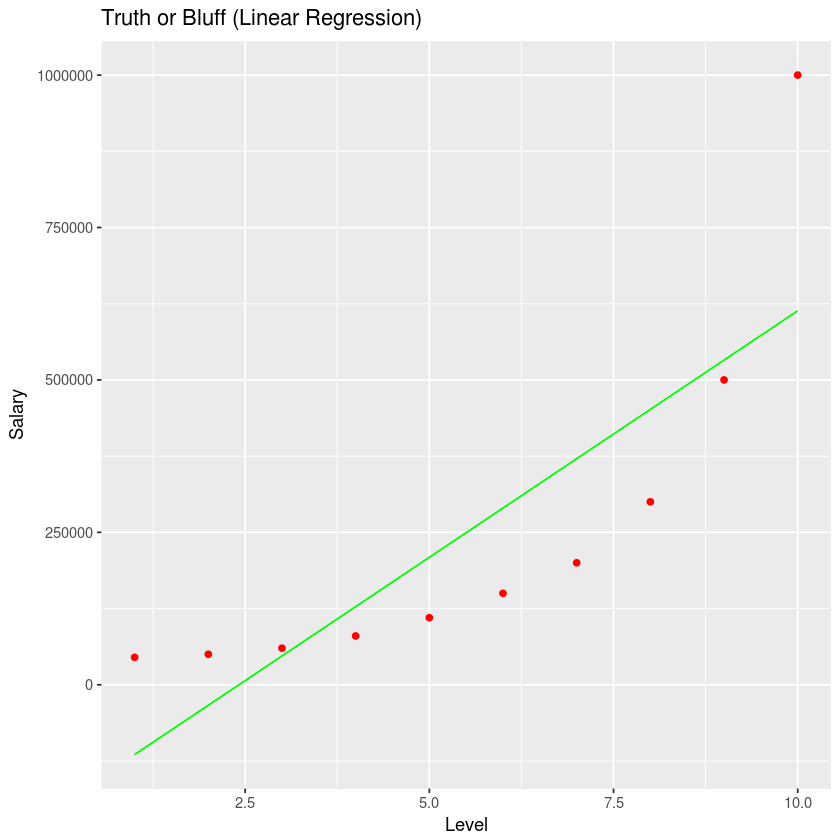

In [31]:
## geom for geometrical
ggplot() +
    geom_point(aes(x = dataset$Level, y = dataset$Salary),
               colour = 'red') +
    geom_line(aes(x = dataset$Level, y = predict(lin_reg, newdata = dataset)),
              colour = 'green')+
    ggtitle('Truth or Bluff (Linear Regression)') +
    xlab('Level') +
    ylab('Salary')

### Visualising the Polynomial Regression results

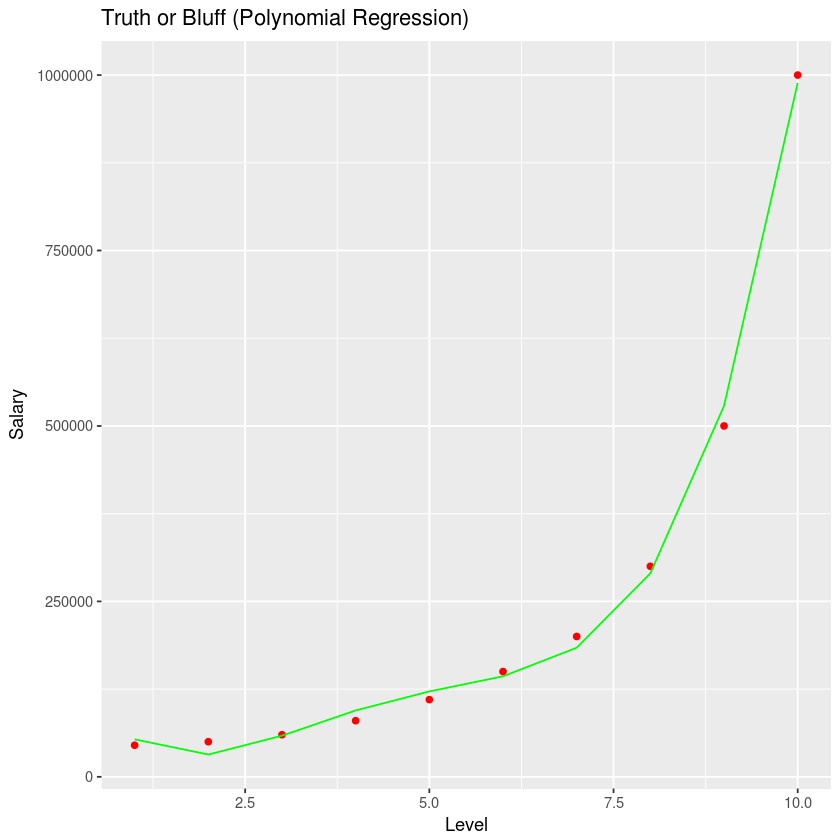

In [53]:
## geom for geometrical
ggplot() +
    geom_point(aes(x = dataset$Level, y = dataset$Salary),
               colour = 'red') +
    geom_line(aes(x = dataset$Level, y = predict(poly_reg, newdata = dataset)),
              colour = 'green')+
    ggtitle('Truth or Bluff (Polynomial Regression)') +
    xlab('Level') +
    ylab('Salary')

### Get a more continuous curve

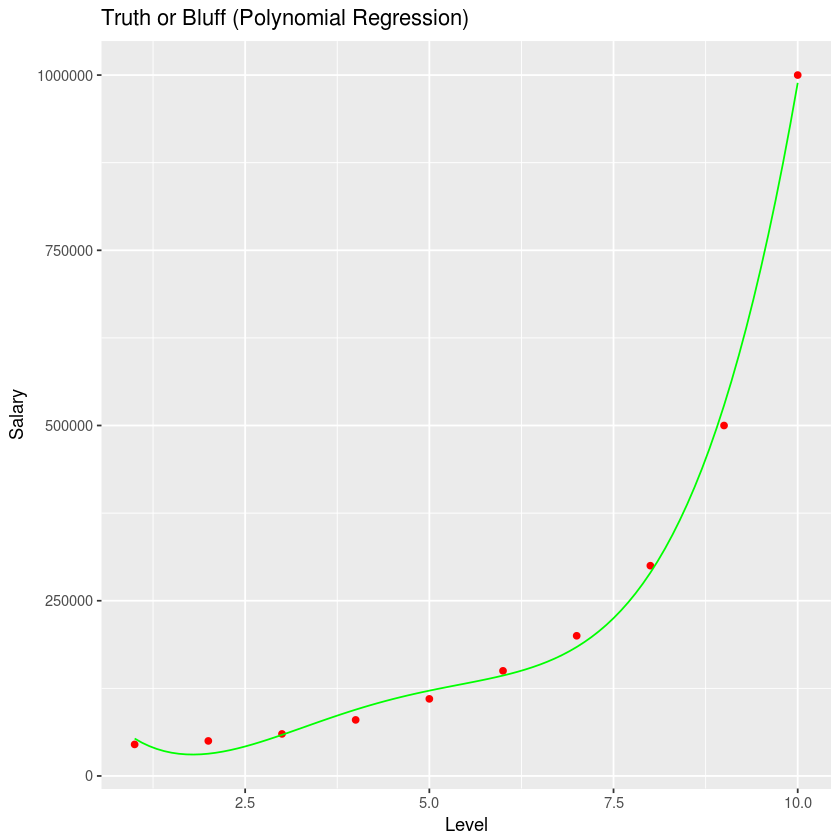

In [58]:
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.1)

## geom for geometrical
ggplot() +
    geom_point(aes(x = dataset$Level, y = dataset$Salary),
               colour = 'red') +
    geom_line(aes(x = x_grid, y = predict(poly_reg, 
                                                 newdata = data.frame(Level = x_grid,
                                                                     Level2 = x_grid^2,
                                                                     Level3 = x_grid^3,
                                                                     Level4 = x_grid^4))),
              colour = 'green')+
    ggtitle('Truth or Bluff (Polynomial Regression)') +
    xlab('Level') +
    ylab('Salary')

### Predicting a new result with Linear Regression

In [49]:
predict(lin_reg, data.frame(Level = 6.5))

1 
330378.8

### Predicting a new result with Polynomial Regression

In [61]:
predict(poly_reg, data.frame(Level = 6.5, 
                             Level2 = 6.5^2, 
                             Level3 = 6.5^3, 
                             Level4 = 6.5^4))

1 
158862.5


* * *

Since the result is 158K which is approximately equal to 160K, therefore the new emplyoee is not bluffing and he is honest.

* * *
